Assignment on Classification technique Every year many students give the GRE
exam to get admission in foreign Universities. The data set contains GRE
Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of
5), Statement of Purpose strength (out of 5), Letter of Recommendation
strength (out of 5), Undergraduate GPA (out of 10), Research Experience
(0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable. Data
Set: https://www.kaggle.com/mohansacharya/graduate-admissions The
counselor of the firm is supposed check whether the student will get an
admission or not based on his/her GRE score and Academic Score. So to
help the counselor to take appropriate decisions build a machine learning
model classifier using Decision tree to predict whether a student will get
admission or not.
a) Apply Data pre-processing (Label Encoding, Data Transformation....)
techniques if necessary.
b) Perform data-preparation (Train-Test Split)
c) Apply Machine Learning Algorithm
d) Evaluate Model.

In [4]:
import  pandas as pd;
import numpy as np;
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [5]:
df=pd.read_csv('Admission.csv')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.rename(columns={"Chance of Admit":"admitted"},inplace=True)
df['admitted']=df['admitted'].apply(lambda x:1 if x>=0.5 else 0)

In [15]:
X=df[['GRE Score',"TOEFL Score","University Rating","SOP","LOR","CGPA","Research"]]
Y=df["admitted"]

In [16]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
clf.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [19]:
y_pred=clf.predict(X_test)

In [20]:
accuracy=accuracy_score(Y_test,y_pred)
confusion=confusion_matrix(Y_test,y_pred)
report=classification_report(Y_test,y_pred)

In [25]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', report)

Accuracy: 0.93
Confusion Matrix:
 [[ 4  6]
 [ 0 70]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.92      1.00      0.96        70

    accuracy                           0.93        80
   macro avg       0.96      0.70      0.77        80
weighted avg       0.93      0.93      0.91        80



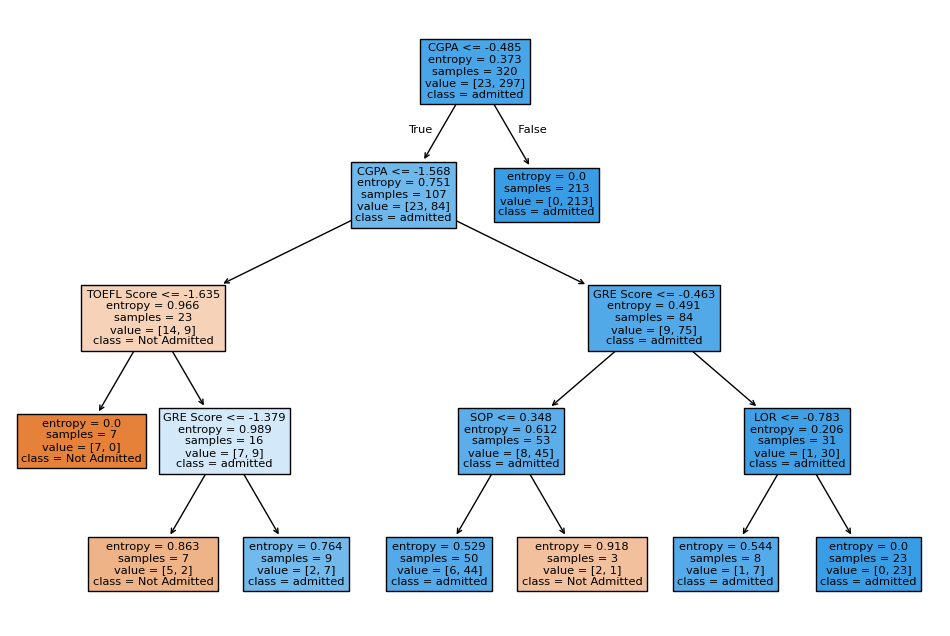

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns.to_list(), 
          class_names=['Not Admitted', 'admitted'], filled=True)
plt.show()